In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tools.label_extract import read_extracted_labels, labels_to_df, labels_to_simple_df, df_labels_to_point_list
from defs.storage_locs import extracted_image_path, extracted_label_path
from court_segment.plot_court_labels import plot_labels
from tools.visualization import plot_image

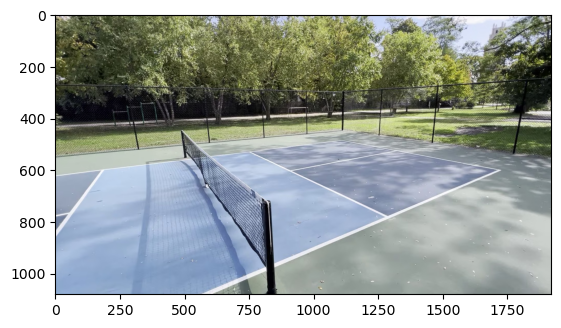

In [2]:
sample_img = cv2.imread(extracted_image_path('center_right_1', 0))
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
plt.imshow(sample_img)

In [3]:
from tools.data_loading import POINT_LABELS
sample_labels = read_extracted_labels(extracted_label_path('center_right_1'))
sample_np = labels_to_simple_df(sample_labels)
# '0'][POINT_LABELS])
X = sample_img
y = sample_np[sample_np.index == '0'][POINT_LABELS]

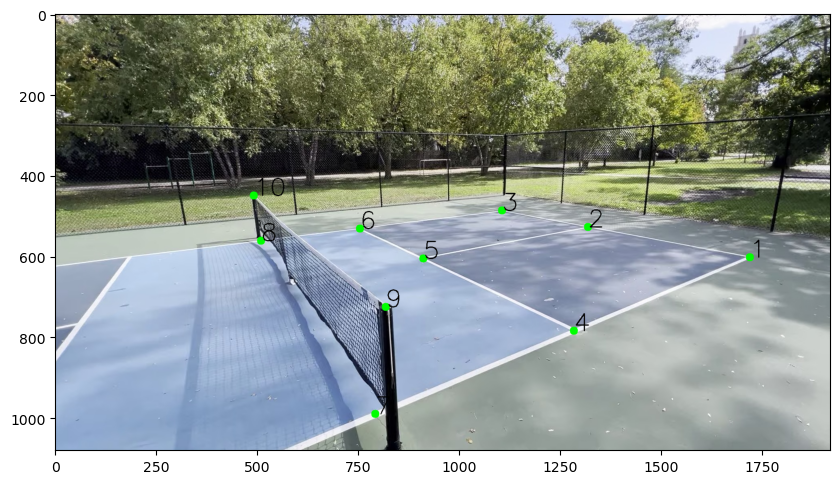

In [4]:
def group_points_by_2(points):
    # create list of points grouped by 2
    grouped_points = []
    for i in range(0, len(points), 2):
        grouped_points.append(points[i:i+2])
    return grouped_points
labels = group_points_by_2(y.values[0])
plot_image(plot_labels(X, labels))

# Translating
move the image and move the labels accordingly

In [5]:
y

1_x     1_y      2_x     2_y     3_x     3_y      4_x    4_y     5_x  \
0  1721.35  602.89  1320.23  527.85  1107.6  486.68  1285.09  784.6  912.77   

      5_y    6_x     6_y     7_x     7_y    8_x     8_y     9_x     9_y  \
0  605.98  755.9  531.67  793.75  990.55  510.1  561.47  819.12  725.25   

     10_x    10_y  
0  492.17  449.73

In [6]:
labels

[array([1721.35, 602.89], dtype=object),
 array([1320.23, 527.85], dtype=object),
 array([1107.6, 486.68], dtype=object),
 array([1285.09, 784.6], dtype=object),
 array([912.77, 605.98], dtype=object),
 array([755.9, 531.67], dtype=object),
 array([793.75, 990.55], dtype=object),
 array([510.1, 561.47], dtype=object),
 array([819.12, 725.25], dtype=object),
 array([492.17, 449.73], dtype=object)]

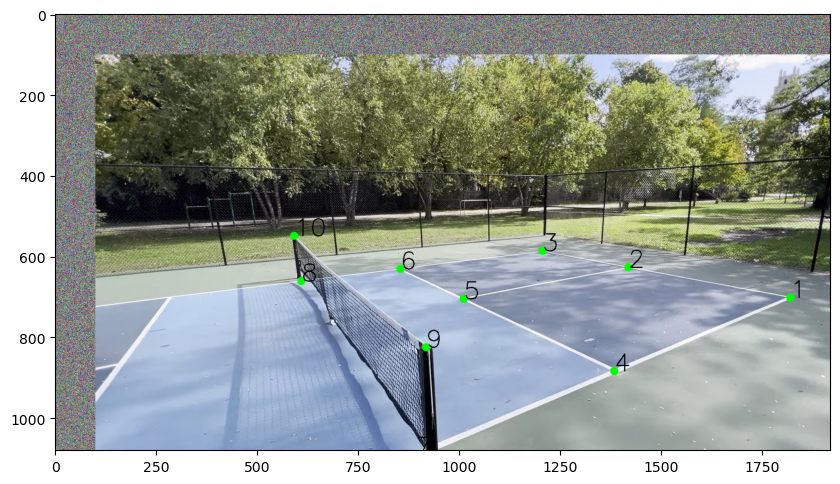

In [7]:
dx = 100
dy = 100
# Translate X
M = np.float32([[1,0,dx],[0,1,dy]])
rows, cols, _ = X.shape
X_translated = cv2.warpAffine(X,M,(cols,rows))
# fill in the empty space created from shifting with random noise
white = np.ones((rows, cols, 3), dtype=np.uint8) * 1
mask = 1 - cv2.warpAffine(white,M,(cols,rows))
# generate random noise for the mask
noise = mask * np.random.randint(0, 255, (rows, cols, 3))
X_translated = X_translated + noise

# Translate y by dx, dy by applying perspective transform
y_labels = group_points_by_2(y.values[0])
new_labels = []
for l in y_labels:
    # convert to vector to multiply
    l = np.array(l)
    l = np.append(l, 1)
    l = M @ l.T
    # convert back to list
    l = l.tolist()
    new_labels.append(l)
y_translated = new_labels

# y_translated
plot_image(plot_labels(X_translated, y_translated))

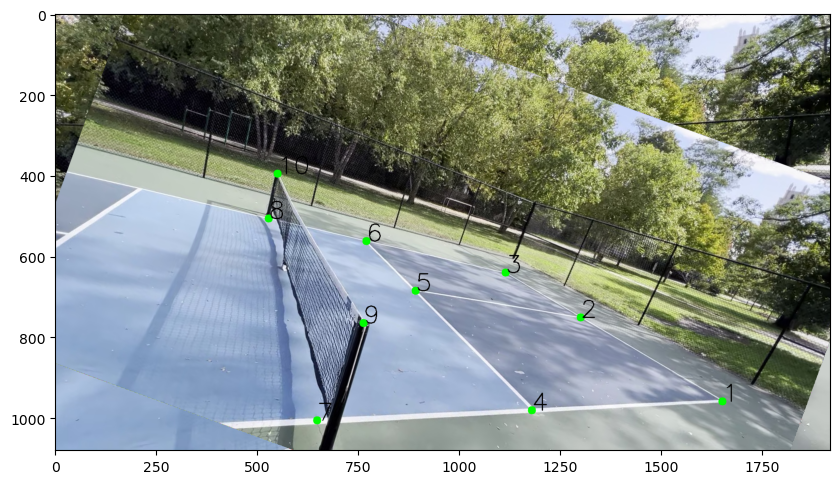

In [8]:
# now do it with rotation of angle theta
theta = 20
theta = theta/180*np.pi
rows, cols, _ = X.shape
dx = 0
dy = 100
# compute adjustment to center image after rotation
center_dx = (cols/2) * (1 - np.cos(theta)) + (rows/2) * np.sin(theta)
center_dy = (rows/2) * (1 - np.cos(theta)) - (cols/2) * np.sin(theta)
dx = dx + center_dx
dy = dy + center_dy
M = np.float32([[np.cos(theta),-np.sin(theta),dx],[np.sin(theta),np.cos(theta),dy]])
X_translated = cv2.warpAffine(X,M,(cols,rows))
# fill in the empty space created from shifting with random noise
white = np.ones((rows, cols, 3), dtype=np.uint8) * 1
mask = 1 - cv2.warpAffine(white,M,(cols,rows))
# generate random noise for the mask
noise = mask * np.random.randint(0, 255, (rows, cols, 3))
X_translated = X_translated + X * mask

# Translate y by dx, dy by applying perspective transform
y_labels = group_points_by_2(y.values[0])
new_labels = []
for l in y_labels:
    # convert to vector to multiply
    l = np.array(l)
    l = np.append(l, 1)
    l = M @ l.T
    # convert back to list
    l = l.tolist()
    new_labels.append(l)
y_translated = new_labels

# y_translated
plot_image(plot_labels(X_translated, y_translated))

# Test Code


In [9]:
from tools.data_loading import read_data_to_numpy
from tools.augment_images import apply_random_affine
import numpy as np
from court_segment.plot_court_labels import plot_random_labeled_image

In [10]:
(X, y) = read_data_to_numpy('center_left_1')

In [11]:
(X_new, y_new) = apply_random_affine(X, y, 2)

In [12]:
np.concatenate([X,X], axis=0) == X_new

array([[[[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        ...,

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ T

In [13]:
X.shape

(98, 1080, 1920, 3)

In [14]:
X_new.shape

(196, 1080, 1920, 3)

In [15]:
X_new, y_new = apply_random_affine(X, y, 1, (-15, 15), ((-20, 20), (-10, 10)))

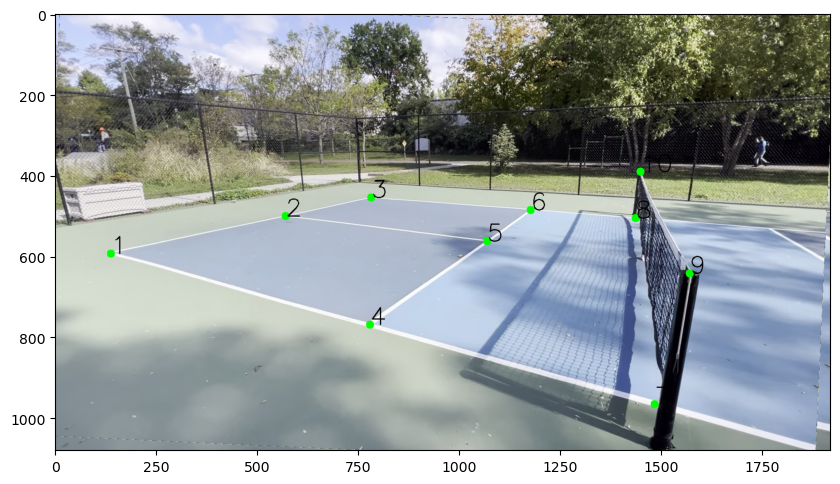

In [16]:
plot_random_labeled_image(X_new, y_new)

In [17]:
from tools.augment_images import apply_random_affine_and_flip

In [18]:
(X_new, y_new) = apply_random_affine_and_flip(X, y, 1, (-20, 20), ((-100, 100), (-50, 50)))

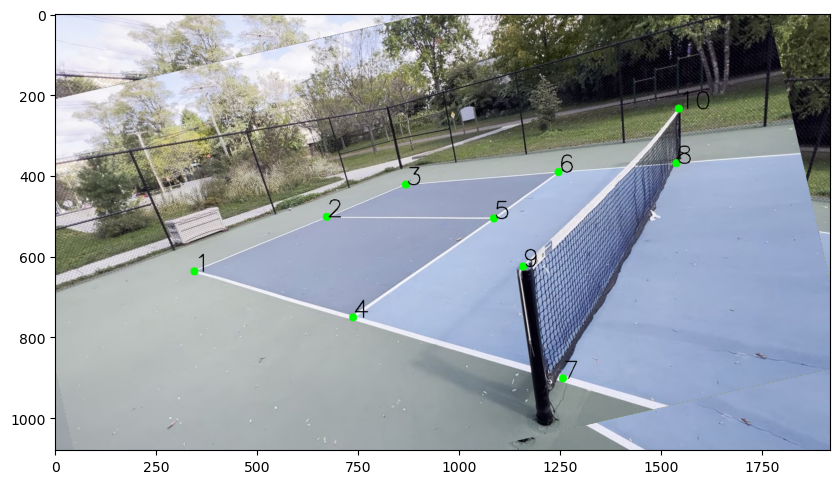

In [19]:
plot_random_labeled_image(X_new, y_new)

In [20]:
import pandas as pd

In [21]:
a = pd.DataFrame(y_new, columns=POINT_LABELS)
a["hello"] = range(len(y_new))
a.to_json('test.json', orient='records')

In [22]:
pd.read_json('test.json', orient='records')

1_x         1_y          2_x         2_y          3_x         3_y  \
0   1571.063411  567.267408  1222.625025  470.991667  1021.075338  413.243538   
1   1503.130828  570.642430  1146.293049  488.390442   942.275949  438.722404   
2   1527.810365  419.579063  1162.591198  423.590126   952.615287  423.657001   
3   1479.863581  479.281682  1127.311875  400.392456   920.432997  352.169761   
4   1457.708629  328.241450  1101.559962  345.512787   887.631446  354.238906   
..          ...         ...          ...         ...          ...         ...   
93  1528.149540  328.516280  1140.789015  362.950079   923.599998  380.493438   
94   435.763726  491.932561   821.970013  428.409239  1036.000565  392.567854   
95   404.432886  332.077693   793.676199  328.001594  1011.336735  324.747819   
96   298.515972  514.734328   679.845948  434.094622   892.305560  386.837207   
97   341.861896  479.765746   696.639516  434.237794   906.661846  406.292590   

            4_x         4_y          5_x         5_y  ...         6_y  \
0   1186.911961  731.000401   811.291145  523.110483  ...  428.492089   
1   1121.115582  750.035873   740.065498  556.753407  ...  469.332148   
2   1200.548178  681.472552   783.458871  587.556944  ...  543.136704   
3   1101.969909  660.374061   717.927776  472.482910  ...  386.977447   
4   1143.151056  600.638883   726.442013  523.584441  ...  487.106717   
..          ...         ...          ...         ...  ...         ...   
93  1145.784671  706.705935   722.223433  599.154728  ...  553.877123   
94   900.206834  763.946489  1282.954914  554.592010  ...  466.829728   
95   825.468410  668.626656  1233.875700  521.849767  ...  458.764114   
96   778.725427  755.037240  1149.183493  532.563642  ...  438.102193   
97   696.372898  698.612546  1093.970918  545.914121  ...  474.498465   

            7_x          7_y          8_x         8_y          9_x  \
0    685.081815   940.590272   356.752829  441.729443   748.658187   
1    635.303986   978.896548   279.671789  492.686388   681.807137   
2    782.316776  1021.157775   321.644432  633.014033   758.042395   
3    612.035997   893.834803   258.677211  413.441411   659.099123   
4    739.901630   954.106492   263.893004  590.207992   705.936613   
..          ...          ...          ...         ...          ...   
93   591.744972  1254.502743   264.076058  683.984897   434.816601   
94  1568.988967  1148.465063  1749.994221  524.066816  1657.021224   
95  1425.702418  1150.011016  1700.261259  560.999365  1559.586491   
96  1470.002627  1100.725059  1612.493785  478.851526  1550.873790   
97  1157.684420   976.331288  1561.536681  526.325406  1139.126822   

           9_y         10_x        10_y  hello  
0   663.263453   340.064366  310.692207      0  
1   694.813975   258.599824  362.927504      1  
2   732.668758   268.284251  514.448352      2  
3   605.886184   231.486042  282.741253      3  
4   667.165195   202.144576  470.100352      4  
..         ...          ...         ...    ...  
93  996.549771   191.150152  566.114750     93  
94  865.807144  1791.604672  391.854371     94  
95  881.333051  1763.597389  434.298414     95  
96  800.223923  1651.587473  340.672983     96  
97  687.478644  1591.066931  406.176970     97  

[98 rows x 21 columns]

In [23]:
from tools.data_loading import numpy_to_images_labels

In [24]:
len(X_new)

98

In [25]:
pd.DataFrame(y_new, columns=POINT_LABELS)

1_x         1_y          2_x         2_y          3_x         3_y  \
0   1571.063411  567.267408  1222.625025  470.991667  1021.075338  413.243538   
1   1503.130828  570.642430  1146.293049  488.390442   942.275949  438.722404   
2   1527.810365  419.579063  1162.591198  423.590126   952.615287  423.657001   
3   1479.863581  479.281682  1127.311875  400.392456   920.432997  352.169761   
4   1457.708629  328.241450  1101.559962  345.512787   887.631446  354.238906   
..          ...         ...          ...         ...          ...         ...   
93  1528.149540  328.516280  1140.789015  362.950079   923.599998  380.493438   
94   435.763726  491.932561   821.970013  428.409239  1036.000565  392.567854   
95   404.432886  332.077693   793.676199  328.001594  1011.336735  324.747819   
96   298.515972  514.734328   679.845948  434.094622   892.305560  386.837207   
97   341.861896  479.765746   696.639516  434.237794   906.661846  406.292590   

            4_x         4_y          5_x         5_y          6_x         6_y  \
0   1186.911961  731.000401   811.291145  523.110483   644.374438  428.492089   
1   1121.115582  750.035873   740.065498  556.753407   566.610078  469.332148   
2   1200.548178  681.472552   783.458871  587.556944   595.642302  543.136704   
3   1101.969909  660.374061   717.927776  472.482910   545.132825  386.977447   
4   1143.151056  600.638883   726.442013  523.584441   534.499723  487.106717   
..          ...         ...          ...         ...          ...         ...   
93  1145.784671  706.705935   722.223433  599.154728   546.540297  553.877123   
94   900.206834  763.946489  1282.954914  554.592010  1443.330719  466.829728   
95   825.468410  668.626656  1233.875700  521.849767  1404.984400  458.764114   
96   778.725427  755.037240  1149.183493  532.563642  1304.072591  438.102193   
97   696.372898  698.612546  1093.970918  545.914121  1276.754354  474.498465   

            7_x          7_y          8_x         8_y          9_x  \
0    685.081815   940.590272   356.752829  441.729443   748.658187   
1    635.303986   978.896548   279.671789  492.686388   681.807137   
2    782.316776  1021.157775   321.644432  633.014033   758.042395   
3    612.035997   893.834803   258.677211  413.441411   659.099123   
4    739.901630   954.106492   263.893004  590.207992   705.936613   
..          ...          ...          ...         ...          ...   
93   591.744972  1254.502743   264.076058  683.984897   434.816601   
94  1568.988967  1148.465063  1749.994221  524.066816  1657.021224   
95  1425.702418  1150.011016  1700.261259  560.999365  1559.586491   
96  1470.002627  1100.725059  1612.493785  478.851526  1550.873790   
97  1157.684420   976.331288  1561.536681  526.325406  1139.126822   

           9_y         10_x        10_y  
0   663.263453   340.064366  310.692207  
1   694.813975   258.599824  362.927504  
2   732.668758   268.284251  514.448352  
3   605.886184   231.486042  282.741253  
4   667.165195   202.144576  470.100352  
..         ...          ...         ...  
93  996.549771   191.150152  566.114750  
94  865.807144  1791.604672  391.854371  
95  881.333051  1763.597389  434.298414  
96  800.223923  1651.587473  340.672983  
97  687.478644  1591.066931  406.176970  

[98 rows x 20 columns]

In [26]:
numpy_to_images_labels(X_new, y_new, 'test')

writing to /mnt/f/SeniorProject/data/custom/test


OSError: Cannot save file into a non-existent directory: '/mnt/f/SeniorProject/data/custom/test'

In [ ]:
from defs.storage_locs import custom_label_path, custom_image_path

In [ ]:
labels = pd.read_json(custom_label_path('test'), orient='records')
cv2.imread(custom_image_path('test', 0))

array([[[ 47,  72,  68],
        [ 48,  73,  69],
        [ 47,  72,  68],
        ...,
        [244, 236, 237],
        [244, 236, 237],
        [244, 236, 237]],

       [[ 48,  73,  69],
        [ 48,  73,  69],
        [ 48,  73,  69],
        ...,
        [244, 236, 237],
        [244, 236, 237],
        [244, 236, 237]],

       [[ 46,  71,  67],
        [ 46,  71,  67],
        [ 48,  73,  69],
        ...,
        [244, 236, 237],
        [243, 235, 236],
        [243, 235, 236]],

       ...,

       [[190, 147, 126],
        [190, 147, 126],
        [190, 147, 126],
        ...,
        [171, 164, 155],
        [171, 164, 155],
        [171, 164, 155]],

       [[190, 148, 125],
        [190, 148, 125],
        [190, 148, 125],
        ...,
        [171, 165, 154],
        [171, 165, 154],
        [171, 165, 154]],

       [[190, 148, 125],
        [190, 148, 125],
        [190, 148, 125],
        ...,
        [171, 165, 154],
        [171, 165, 154],
        [171, 165, 154]]

In [ ]:
from tools.data_loading import load_numpy_data

In [ ]:
X, y = load_numpy_data(['test'], '480x270', save=False)

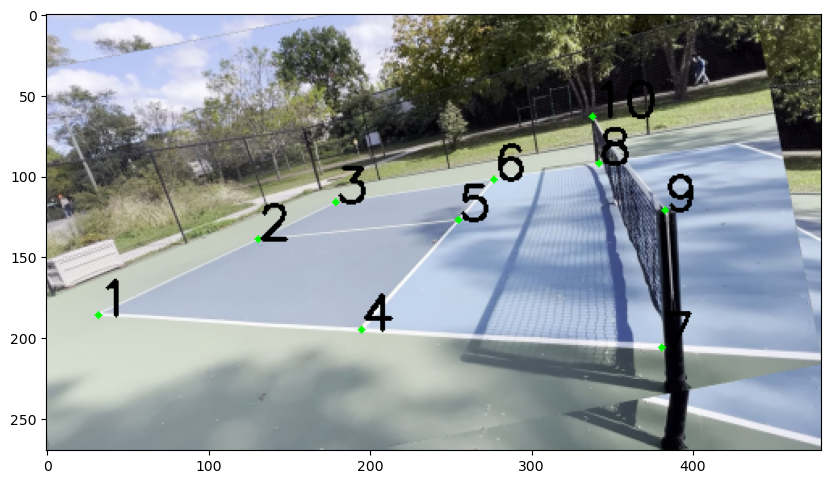

In [ ]:
plot_random_labeled_image(X, y)

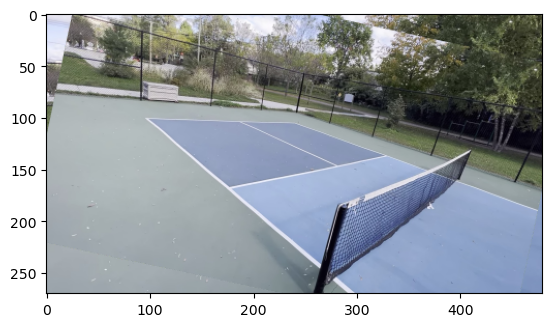

In [ ]:
plt.imshow(X[0])

In [ ]:
X, y = read_data_to_numpy('test', (480, 270), custom=True)

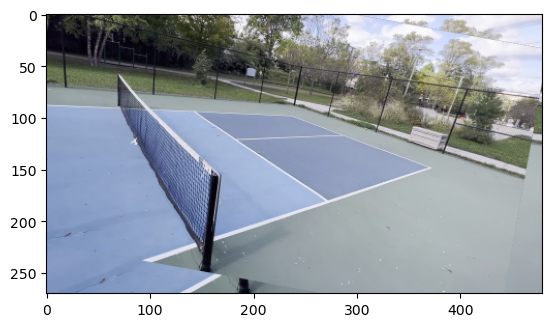

In [ ]:
plt.imshow(X[0])

/mnt/f/SeniorProject/data/custom/center_right_1_flip/center_right_1_flip.json


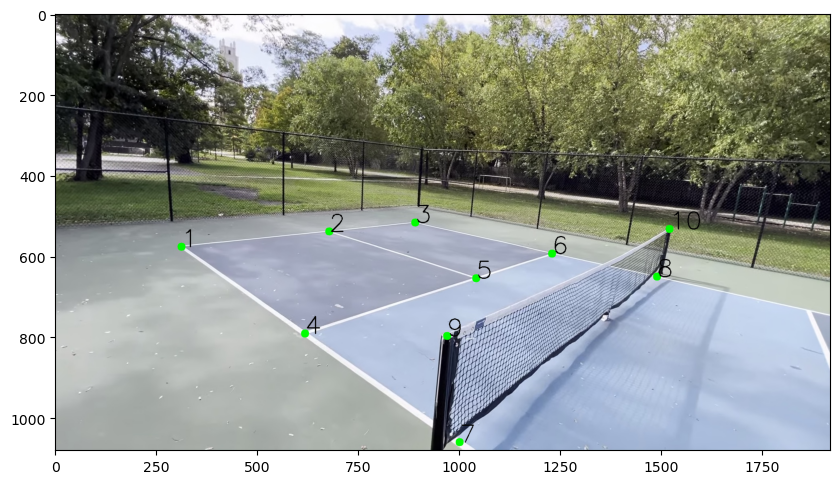

In [ ]:
print(custom_label_path('center_right_1_flip'))
X, y = read_data_to_numpy('center_right_1_flip', custom=True)
plot_random_labeled_image(X, y)

In [ ]:
X, y = read_data_to_numpy('center_right_1_train_flip_affine', custom=True)

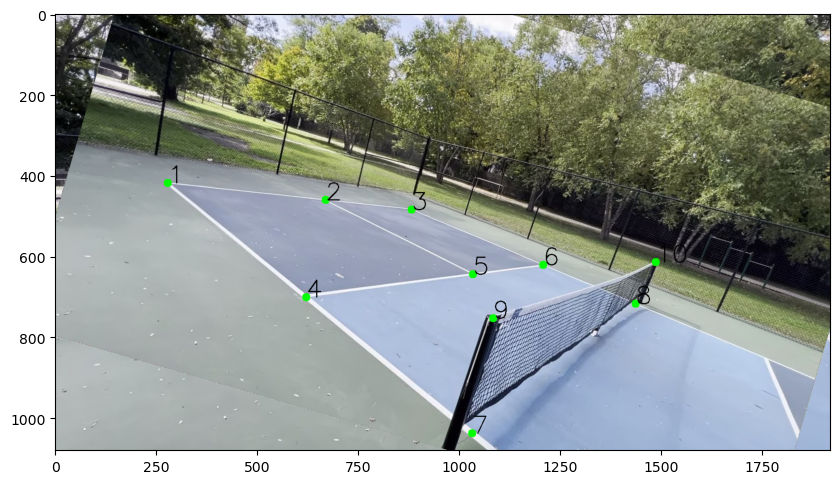

160

In [ ]:
plot_random_labeled_image(X, y)
len(X)

In [43]:
from tools.data_loading import load_numpy_data

In [44]:
X, y = load_numpy_data('noaug_test', '480x270', save=False)

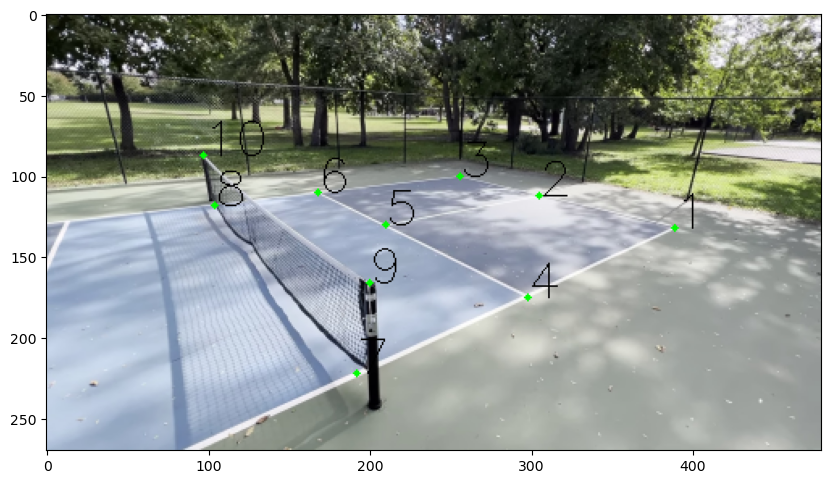

In [66]:
plot_random_labeled_image(X, y)